In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import polars
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# Load the dataset
df = pd.read_csv(r"/content/drive/My Drive/Colab Notebooks/Hotel Booking Data/hotel_booking.csv")

hotel_data = df

In [4]:
import pandas as pd
missing_values = df.isnull().sum()

print(missing_values)

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

The dataset shows some missing values in the following columns:

Children: 4 missing values

Country: 488 missing values

Agent: 16,340 missing values

Company: 112,593 missing values

Drop Columns: Remove the 'Company' and 'Agent' columns.

Remove Rows: Delete rows where 'Country' or 'Children' values are missing.

In [5]:
# Dropping 'Company' and 'Agent' columns
hotel_data_cleaned = hotel_data.drop(['company', 'agent'], axis=1)

# Removing rows with missing 'Country' or 'Children' values
hotel_data_cleaned = hotel_data_cleaned.dropna(subset=['country', 'children'])

In [6]:
# Encoding categorical columns
hotel_data_encoded = hotel_data_cleaned.copy()
label_encoder = LabelEncoder()
categorical_cols = hotel_data_encoded.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    hotel_data_encoded[col] = label_encoder.fit_transform(hotel_data_encoded[col])

Encode Categorical Variables: Convert categorical variables into a numeric format. For simplicity, I'm using label encoding. This assigns a unique integer to each category of the variables.

Correlation Analysis: After encoding, we'll compute a correlation matrix to understand the relationships between the features and the Average Daily Rate (ADR).

In [7]:
selected_features = [
    'reserved_room_type', 'children', 'assigned_room_type',
    'market_segment', 'adults', 'arrival_date_year',
    'total_of_special_requests', 'arrival_date_week_number',
    'stays_in_week_nights', 'meal', 'is_repeated_guest',
    'country', 'arrival_date_month'
]
target = 'adr'

In [8]:
# Preparing the feature matrix (X) and target vector (y)
X = hotel_data_encoded[selected_features]
y = hotel_data_encoded[target]

In [9]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Building the Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Value:", r2)

Mean Squared Error: 634.0168720690284
R-squared Value: 0.7199768171308671


ADR Distribution: A histogram or boxplot of ADR to show its distribution. This can highlight the range of rates, central tendencies, and any outliers.

ADR Over Time: A line chart showing ADR trends over time (years or months). This can reveal seasonal trends or year-on-year changes in pricing.

ADR by Room Type: A bar chart comparing the average ADR for different room types. This can indicate which room types are more lucrative.

ADR by Market Segment: A bar chart showing ADR across different market segments (like groups, individuals, corporate). It helps in understanding which segments contribute to higher revenue.

ADR and Length of Stay: A scatter plot showing the relationship between length of stay and ADR. This can reveal if longer stays correlate with higher or lower rates.

ADR by Country of Origin: A bar chart (or heatmap if you have many countries) showing the ADR for top countries. This highlights the spending patterns of guests from different regions.

ADR and Booking Lead Time: A scatter plot to show how ADR varies with lead time. It can indicate if last-minute bookings or early bookings have higher rates.

ADR and Day of Week: A bar chart showing the ADR for different days of the week. This helps in identifying the most profitable days.

ADR and Special Requests: A bar chart comparing ADR with the number of special requests (like non-smoking room, high floor, etc.). This can show if guests with special requests tend to pay higher rates.

Correlation Heatmap: A heatmap of correlation coefficients between ADR and other numerical variables. This gives a high-level view of how various factors are related to ADR.

**ADR Distribution**

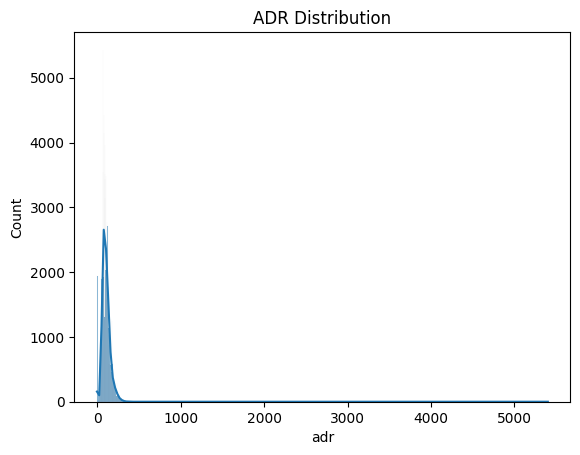

In [11]:
sns.histplot(hotel_data_cleaned['adr'], kde=True)
plt.title('ADR Distribution')
plt.show()

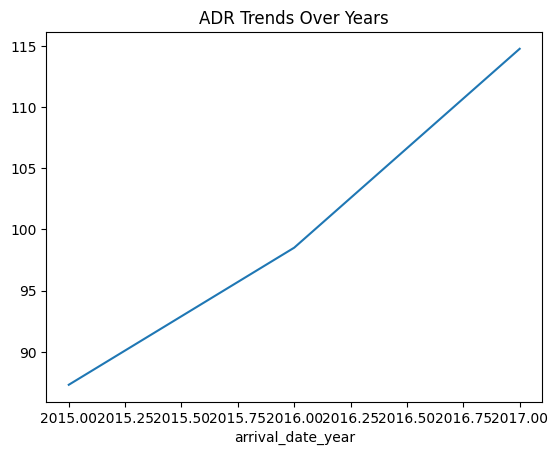

In [12]:
adr_time = hotel_data_cleaned.groupby('arrival_date_year')['adr'].mean()
adr_time.plot(kind='line')
plt.title('ADR Trends Over Years')
plt.show()

ADR by Room Type

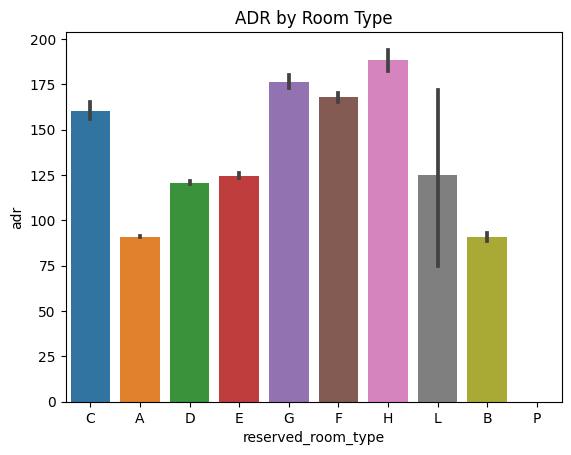

In [13]:
sns.barplot(x='reserved_room_type', y='adr', data=hotel_data_cleaned)
plt.title('ADR by Room Type')
plt.show()

**ADR by Market Segment**

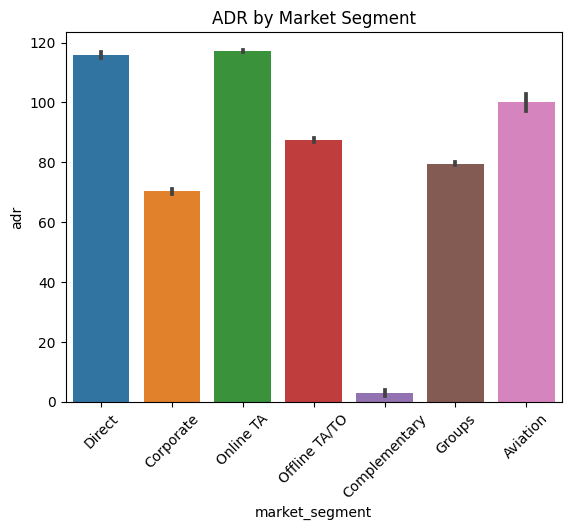

In [14]:
sns.barplot(x='market_segment', y='adr', data=hotel_data_cleaned)
plt.title('ADR by Market Segment')
plt.xticks(rotation=45)
plt.show()

ADR and Length of Stay

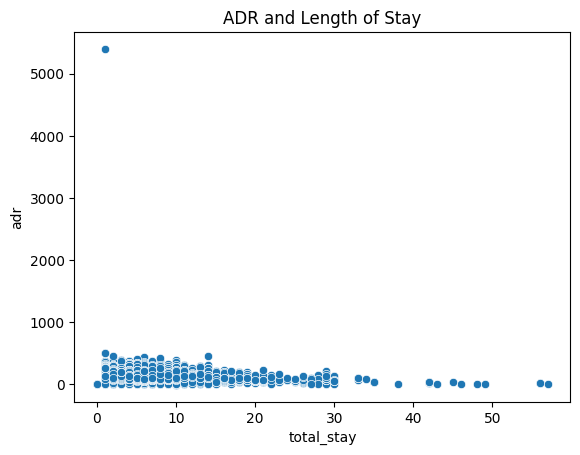

In [15]:
hotel_data_cleaned['total_stay'] = hotel_data_cleaned['stays_in_weekend_nights'] + hotel_data_cleaned['stays_in_week_nights']
sns.scatterplot(x='total_stay', y='adr', data=hotel_data_cleaned)
plt.title('ADR and Length of Stay')
plt.show()

 ADR by Country of Origin (Top 10 Countries)

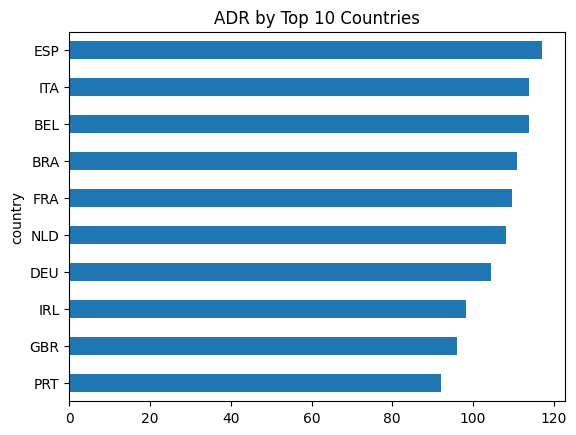

In [16]:
top_countries = hotel_data_cleaned['country'].value_counts().nlargest(10).index
adr_country = hotel_data_cleaned[hotel_data_cleaned['country'].isin(top_countries)].groupby('country')['adr'].mean()
adr_country.sort_values().plot(kind='barh')
plt.title('ADR by Top 10 Countries')
plt.show()

ADR and Booking Lead Time

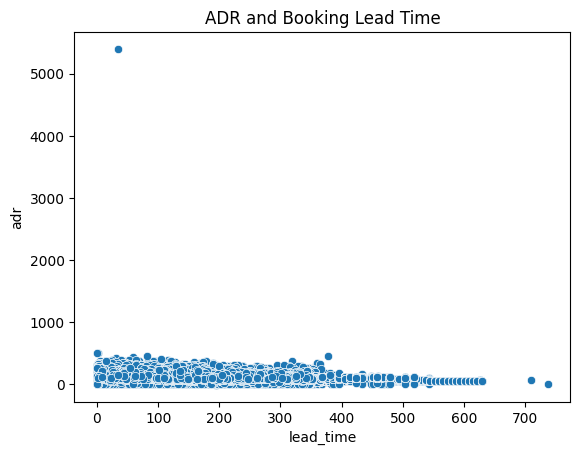

In [17]:
sns.scatterplot(x='lead_time', y='adr', data=hotel_data_cleaned)
plt.title('ADR and Booking Lead Time')
plt.show()

 ADR and Day of Week

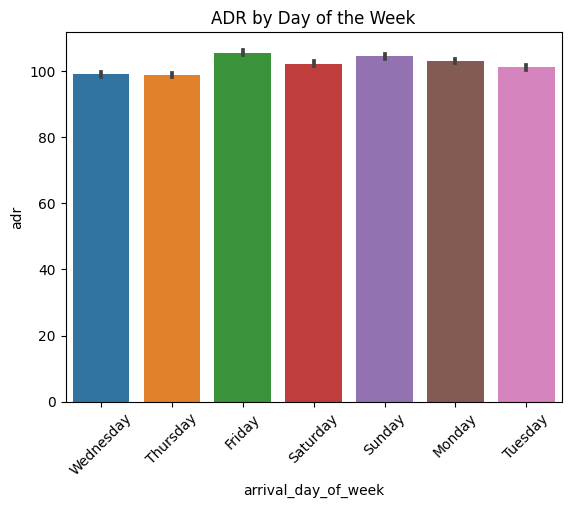

In [18]:
hotel_data_cleaned['arrival_day_of_week'] = pd.to_datetime(hotel_data_cleaned['arrival_date_year'].astype(str) + '-' +
                                                          hotel_data_cleaned['arrival_date_month'] + '-' +
                                                          hotel_data_cleaned['arrival_date_day_of_month'].astype(str)).dt.day_name()
sns.barplot(x='arrival_day_of_week', y='adr', data=hotel_data_cleaned)
plt.title('ADR by Day of the Week')
plt.xticks(rotation=45)
plt.show()

ADR and Special Requests

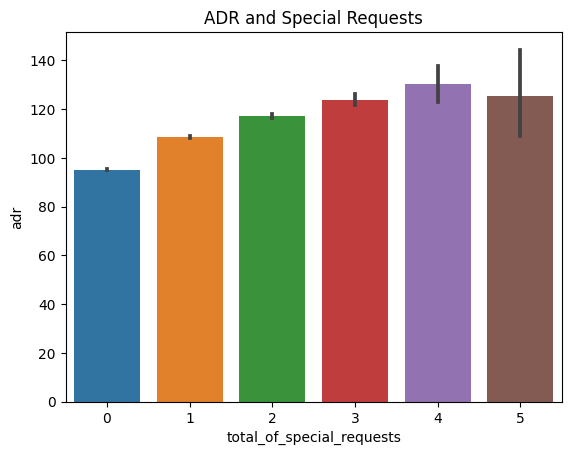

In [19]:
sns.barplot(x='total_of_special_requests', y='adr', data=hotel_data_cleaned)
plt.title('ADR and Special Requests')
plt.show()

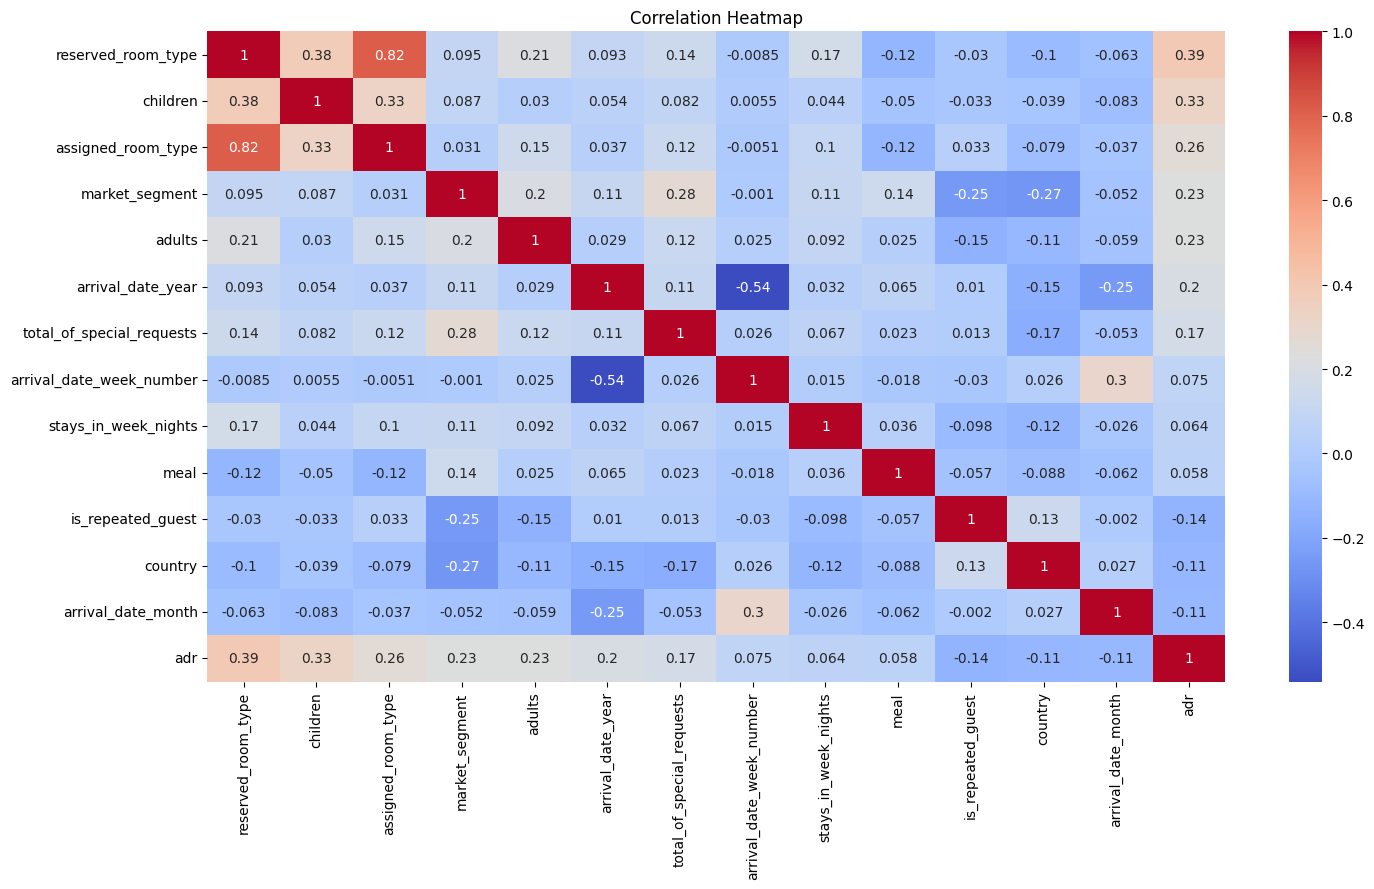

In [29]:
# Correlation Heatmap
# corr = hotel_data_encoded[selected_features + [target]].corr()
# sns.heatmap(corr, annot=True, cmap='coolwarm', ax=axes[4, 1])
# axes[4, 1].set_title('Correlation Heatmap')

corr = hotel_data_encoded[selected_features + [target]].corr()
plt.figure(figsize=(15, 9))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

Positive Correlations: Features like reserved_room_type, children, and assigned_room_type have positive correlations with ADR, suggesting that as these increase, the ADR tends to increase as well.
Negative Correlations: Features such as is_repeated_guest, country, and arrival_date_month show negative correlations, indicating that as these increase, the ADR tends to decrease.
Weak or No Correlations: Some features have very weak or almost no correlation with ADR (e.g., phone-number, credit_card, email).

We will consider features with higher absolute correlation values. These typically include:

reserved_room_type

children

assigned_room_type

market_segment

adults

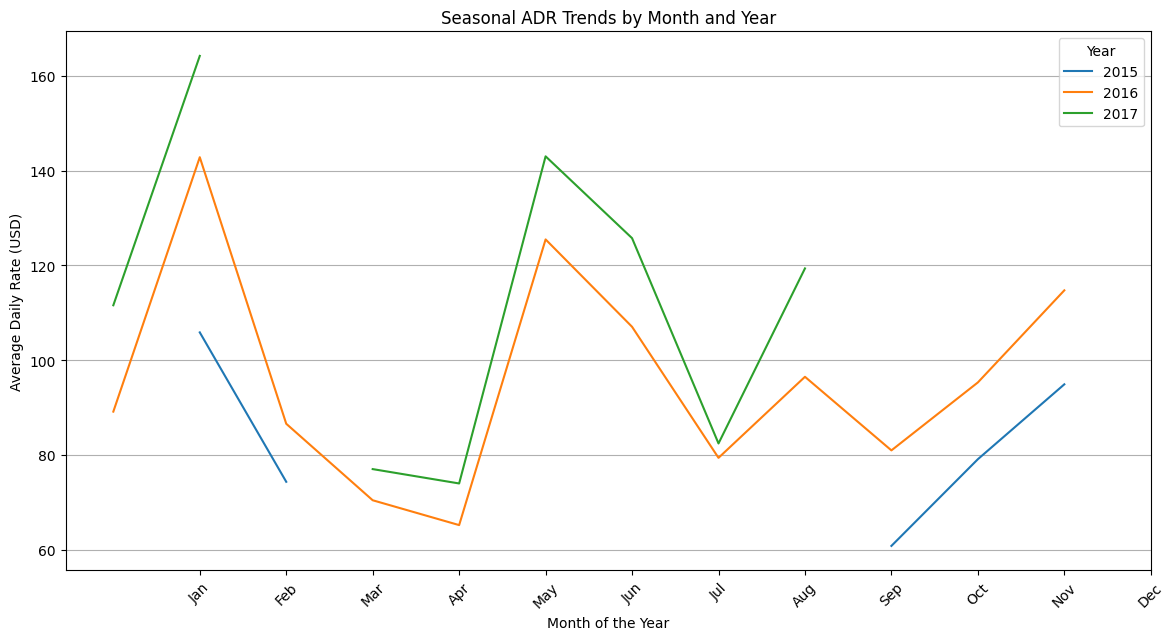

In [31]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import calendar

# Assuming 'monthly_adr_trends' is a DataFrame with average ADR values, indexed by month
monthly_adr_trends.plot(figsize=(14, 7))

# Improve month labels
plt.xticks(ticks=range(1, 13), labels=list(calendar.month_abbr)[1:], rotation=45)

# More descriptive axes labels
plt.xlabel('Month of the Year')
plt.ylabel('Average Daily Rate (USD)')

# Add gridlines
plt.grid(axis='y')

# Add a title
plt.title('Seasonal ADR Trends by Month and Year')

# Ensure the legend is descriptive
plt.legend(title='Year', loc='upper right')

# Show the plot
plt.show()

In [21]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "XGBoost": XGBRegressor()
}

# Function to train and evaluate a model
def train_evaluate(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, r2

# Train and evaluate each model
results = {}
for name, model in models.items():
    mse, r2 = train_evaluate(model, X_train, X_test, y_train, y_test)
    results[name] = {"MSE": mse, "R-squared": r2}

# Display results
for model_name, metrics in results.items():
    print(f"{model_name} - MSE: {metrics['MSE']}, R-squared: {metrics['R-squared']}")

Linear Regression - MSE: 1513.0110224341036, R-squared: 0.3317556978642189
Ridge Regression - MSE: 1513.0107550375549, R-squared: 0.33175581596396664
Lasso Regression - MSE: 1533.7760526174666, R-squared: 0.32258450684316065
Decision Tree - MSE: 1018.3247160730918, R-squared: 0.5502414198244758
Gradient Boosting - MSE: 897.6927978235019, R-squared: 0.6035203390330823
XGBoost - MSE: 645.8684255437793, R-squared: 0.7147423985023639


# **Next Steps:**
 **1) We will perform hyperparameter tuning for XGBoost, as fine-tuning can potentially lead to even better results.**


**2) Cross-validation can be used to ensure the model's stability and generalizability.**


**3) Investigating feature importance in the XGBoost model can provide insights into which factors most heavily influence ADR.**

1. Hyperparameter Tuning for XGBoost
We'll use GridSearchCV from scikit-learn to perform hyperparameter tuning. This tool allows us to define a grid of parameters and will automatically test all combinations to find the best one.

In [22]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 150, 200],       # number of trees we want to have
    'max_depth': [3, 5, 7],                # depth of the tree
    'learning_rate': [0.01, 0.1, 0.2],     #
    'subsample': [0.8, 0.9, 1]             # Summing to
}

# Initialize the XGBoost Regressor
xgb_model = XGBRegressor()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='r2')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters
best_parameters = grid_search.best_params_
print("Best Parameters:", best_parameters)

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best Parameters: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.9}


Hyperparameter Tuning Results:
The best parameters for the XGBoost model are:

{'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.9}.

These parameters indicate a relatively fast learning rate, a substantial depth for each tree to capture complex patterns, a considerable number of trees for the ensemble, and a subsample rate that provides a balance between bias and variance.

2. Cross-Validation
We'll use the best parameters from the grid search to perform cross-validation.

In [23]:
from sklearn.model_selection import cross_val_score

# Initialize the XGBoost Regressor with best parameters
xgb_best = XGBRegressor(**best_parameters)

# Perform cross-validation
cv_scores = cross_val_score(xgb_best, X, y, cv=5, scoring='r2')

# Display the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean R-squared:", cv_scores.mean())
print("Standard Deviation:", cv_scores.std())

Cross-Validation Scores: [0.52737422 0.61701214 0.18137931 0.43330826 0.40936078]
Mean R-squared: 0.4336869425512229
Standard Deviation: 0.14603868246303464


3. Investigating Feature Importance
After training the model with the best parameters, you can examine the feature importances.

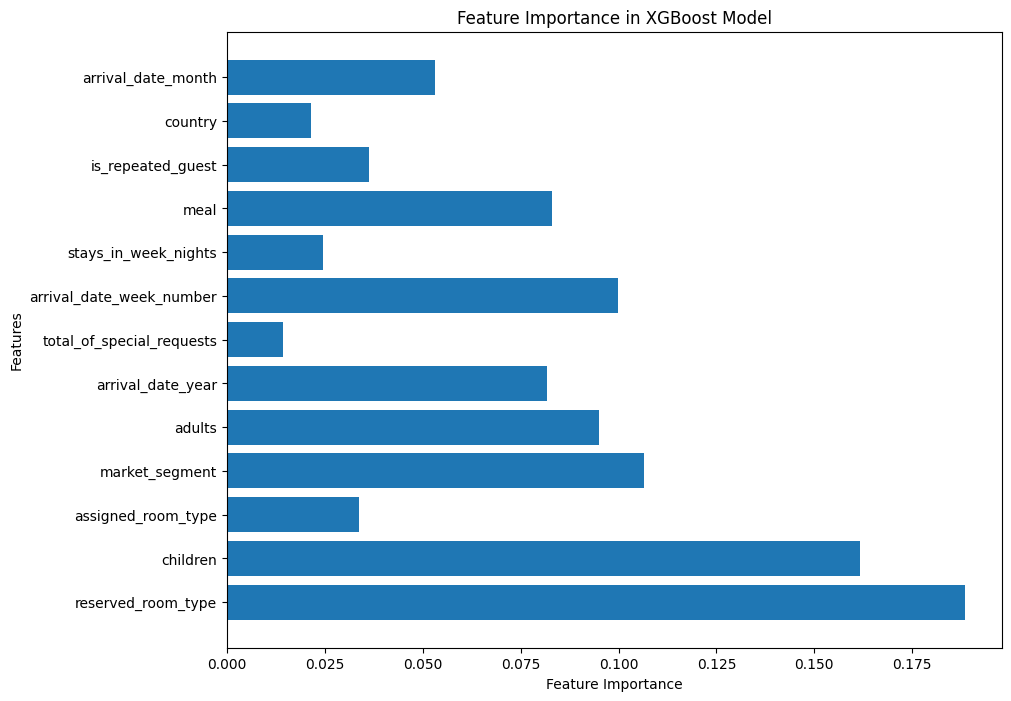

In [24]:
# Fit the model with best parameters
xgb_best.fit(X_train, y_train)

# Get feature importances
feature_importances = xgb_best.feature_importances_

# Creating a bar plot for feature importances
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.barh(selected_features, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance in XGBoost Model')
plt.show()

Cross-Validation Scores:
The cross-validation scores show some variance (0.52737422, 0.61701214, 0.18137931, 0.43330826, 0.40936078), with a mean R-squared of 0.4336869425512229 and a standard deviation of 0.14603868246303464.

The variation in cross-validation scores, especially the one substantially lower score (0.18137931), might indicate that the model's performance is sensitive to the particular subset of data it's trained on, or there could be certain outliers or anomalies in the data that affect the model's performance.

**Feature Importance Visualization:**

From the bar chart, it appears that reserved_room_type and children are among the most important features in predicting ADR, followed by assigned_room_type, market_segment, and adults. This aligns with intuitive understanding—room types and the number of occupants can significantly influence the room rate.

**Key Observations:**

The feature importance chart is a critical tool for understanding which features most strongly influence the ADR. It can inform decision-making regarding pricing strategies and targeted marketing.
The difference in feature importance suggests that focusing on room types and catering to specific market segments or family compositions could be effective strategies for revenue optimization.

In [26]:
# import pickle

# # Assuming 'xgb_best' is your trained XGBoost model
# with open('xgb_best_model.pkl', 'wb') as file:
#     pickle.dump(xgb_best, file)

In [27]:
# path = "/content/drive/My Drive/Colab Notebooks/Hotel Booking Data/xgb_best_model.pkl"

# import pickle

# # Save the pickle file
# with open(path, 'wb') as file:
#     pickle.dump(xgb_best, file)